This analysis seeks to find ways to draw the inner contour based on just the outer contour.

In [66]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.insert(0,r'/Users/jessica/Documents/image_contours_for_segmentation')

import ast

from epochs import create_epoch, create_file_info_df, parse_dicom_file, parse_contour_file, poly_to_mask

In [69]:
# function and test to compute average intensity

def compute_average_intensity(img,mask):
    return float(np.sum(np.multiply(img,mask)))/float(np.sum(mask))

def test_compute_average_intensity():
    img = np.zeros((50,50))
    img[10:20,10:20] = 100
    img[10:20,10:15] = 5
    mask = img>50
    return compute_average_intensity(img,mask)

test_compute_average_intensity()

100.0

In [71]:
# load the file containing the filepaths to the images and the 
# coordinates of the inner and outer contours (generated using epochs.py)

file_info = pd.read_csv('../testing/file_info.csv')
file_info.head()

Unnamed: 0                dicom_file_name_with_path  \
0           0   ../final_data/dicoms/SCD0000101/59.dcm   
1           0   ../final_data/dicoms/SCD0000101/79.dcm   
2           0   ../final_data/dicoms/SCD0000101/99.dcm   
3           0  ../final_data/dicoms/SCD0000101/119.dcm   
4           0  ../final_data/dicoms/SCD0000101/139.dcm   

                       i_contour_file_name_with_path  \
0  ../final_data/contourfiles/SC-HF-I-1/i-contour...   
1  ../final_data/contourfiles/SC-HF-I-1/i-contour...   
2  ../final_data/contourfiles/SC-HF-I-1/i-contour...   
3  ../final_data/contourfiles/SC-HF-I-1/i-contour...   
4  ../final_data/contourfiles/SC-HF-I-1/i-contour...   

                                            i_coords  image_num  \
0  [(130.5, 118.0), (131.0, 118.0), (131.5, 117.5...         59   
1  [(130.0, 114.5), (130.5, 114.5), (131.0, 114.5...         79   
2  [(135.5, 114.0), (136.0, 114.0), (136.5, 114.0...         99   
3  [(130.0, 113.5), (130.5, 113.5), (131.0, 113.5...        119   
4  [(139.0, 116.5), (139.5, 116.5), (140.0, 117.0...        139   

                       o_contour_file_name_with_path  \
0  ../final_data/contourfiles/SC-HF-I-1/o-contour...   
1  ../final_data/contourfiles/SC-HF-I-1/o-contour...   
2  ../final_data/contourfiles/SC-HF-I-1/o-contour...   
3  ../final_data/contourfiles/SC-HF-I-1/o-contour...   
4  ../final_data/contourfiles/SC-HF-I-1/o-contour...   

                                            o_coords original_id  patient_id  \
0  [(119.0, 140.0), (118.5, 139.5), (118.5, 139.0...   SC-HF-I-1  SCD0000101   
1  [(127.0, 109.0), (127.5, 109.0), (128.0, 109.0...   SC-HF-I-1  SCD0000101   
2  [(137.0, 162.0), (137.0, 162.5), (137.5, 163.0...   SC-HF-I-1  SCD0000101   
3  [(114.5, 113.0), (115.0, 112.5), (115.5, 112.5...   SC-HF-I-1  SCD0000101   
4  [(156.5, 140.5), (156.5, 141.0), (156.0, 141.5...   SC-HF-I-1  SCD0000101   

   patient_num  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

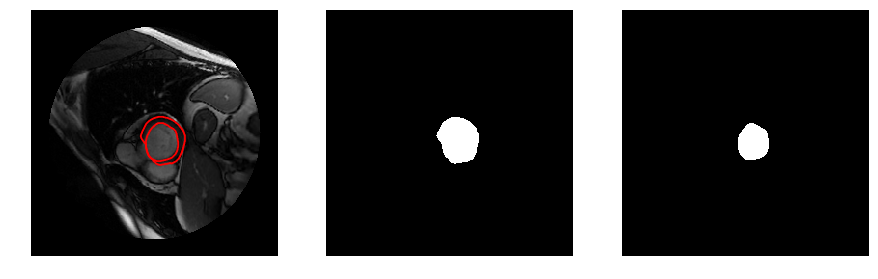

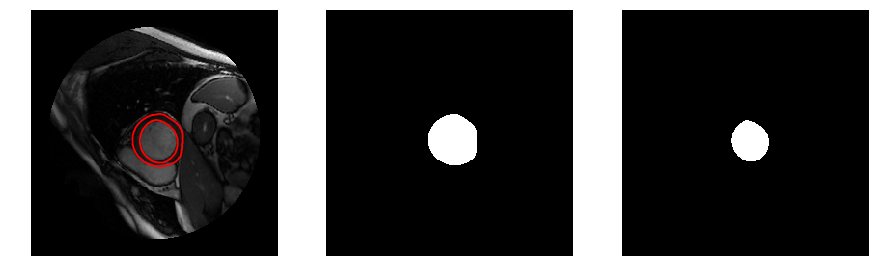

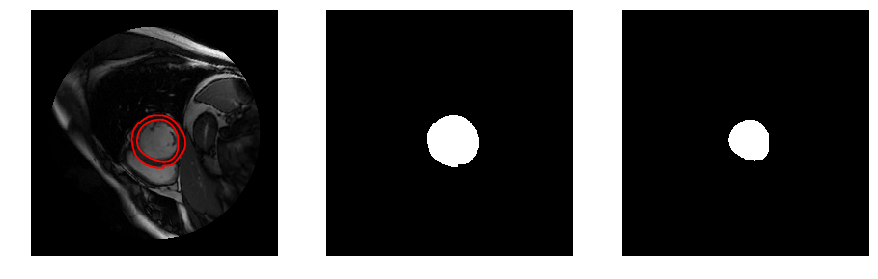

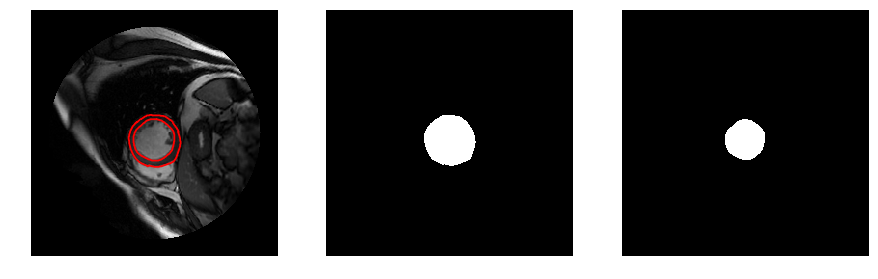

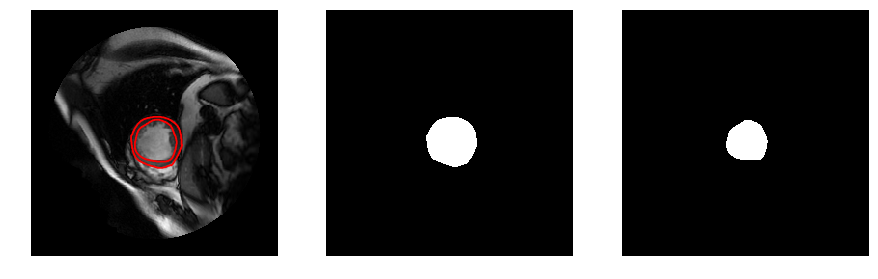

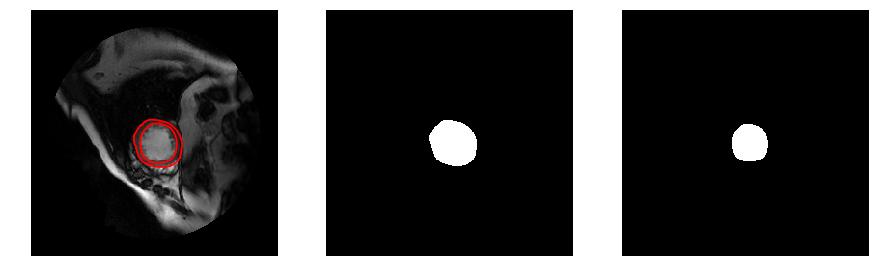

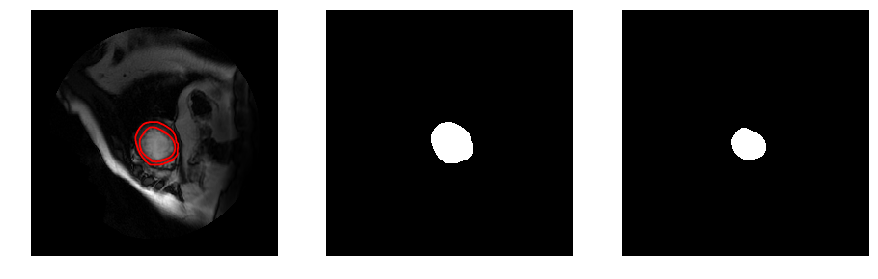

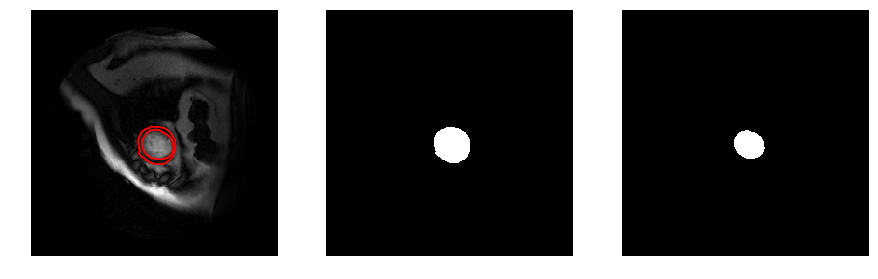

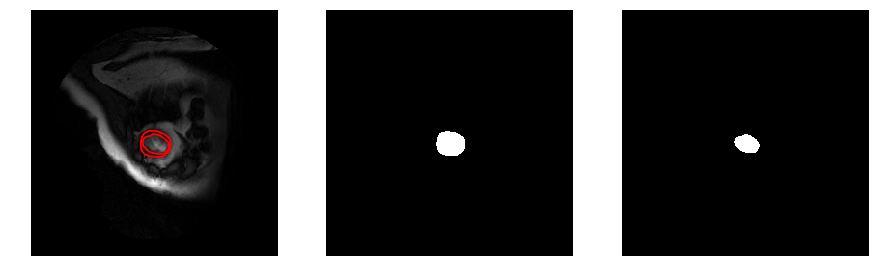

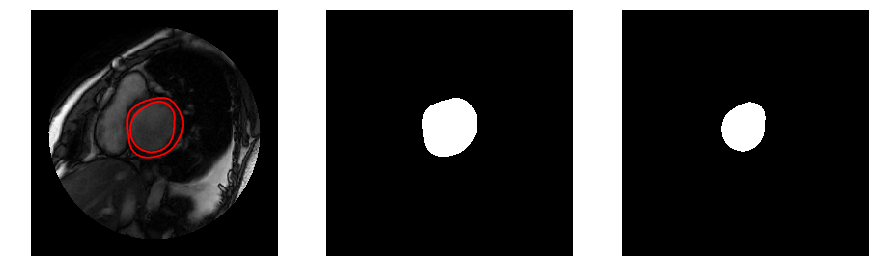

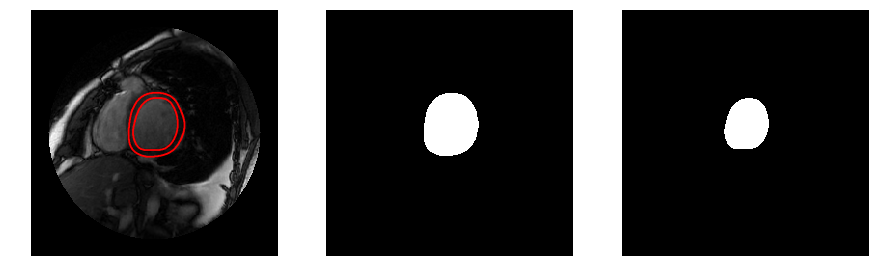

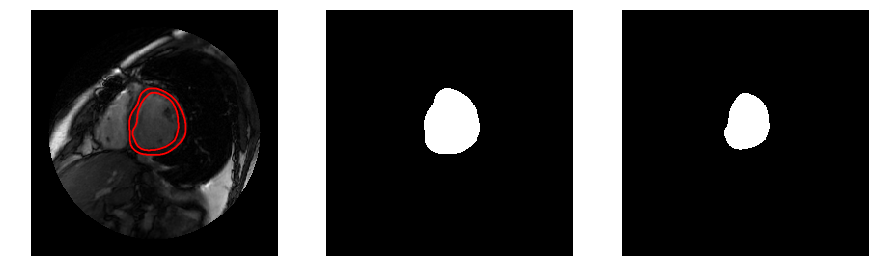

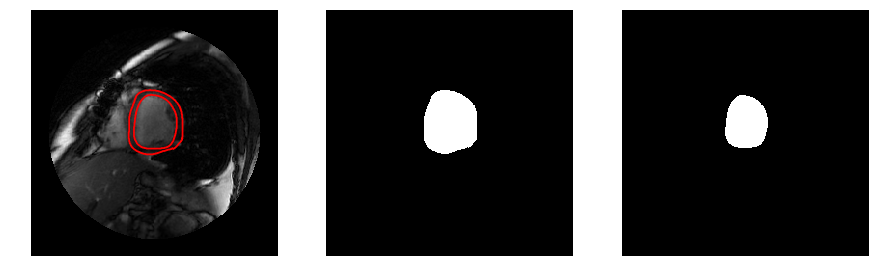

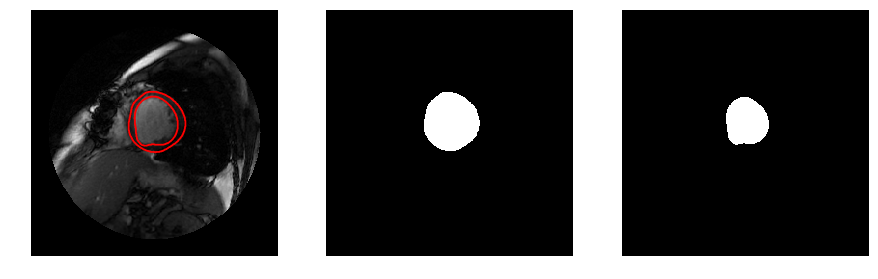

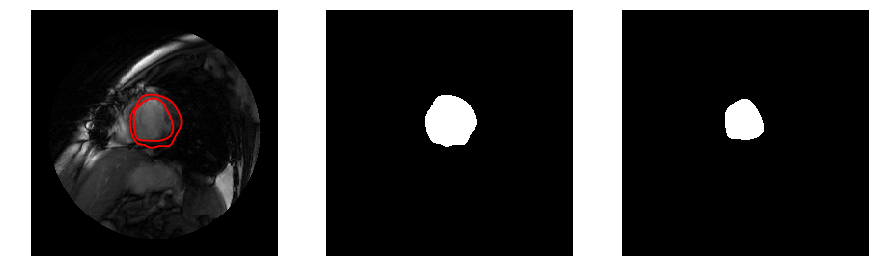

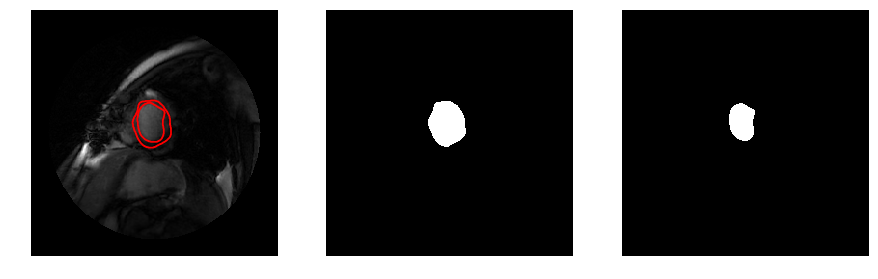

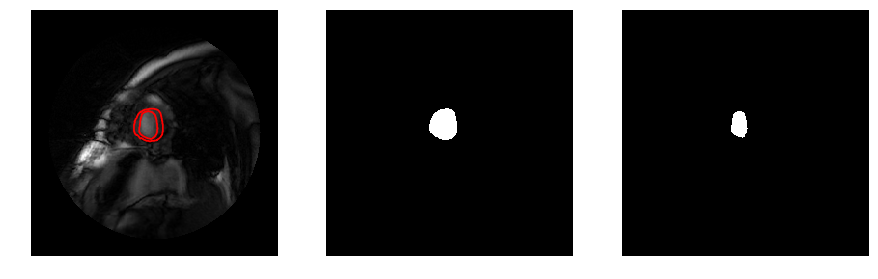

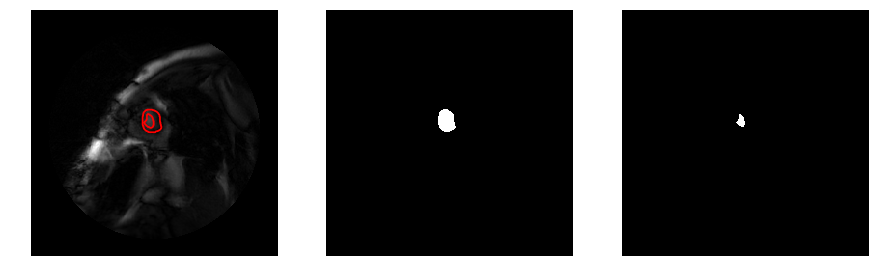

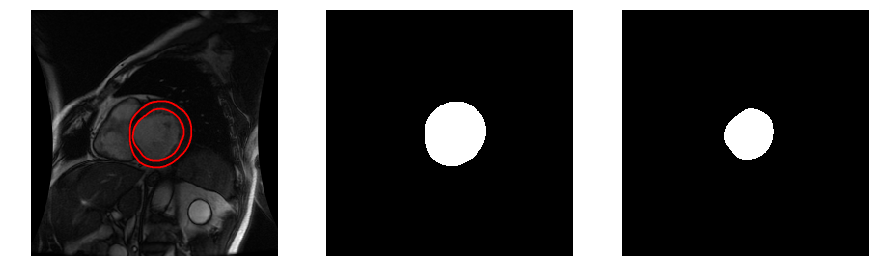

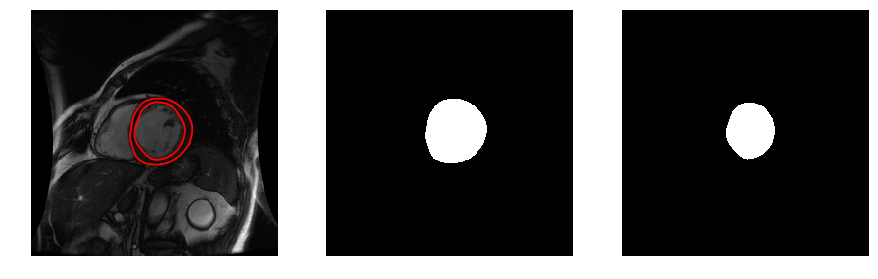

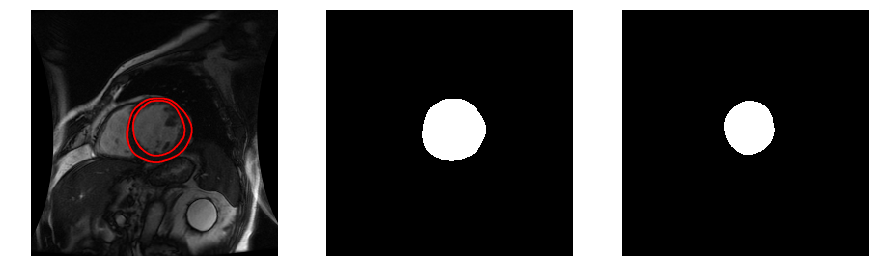

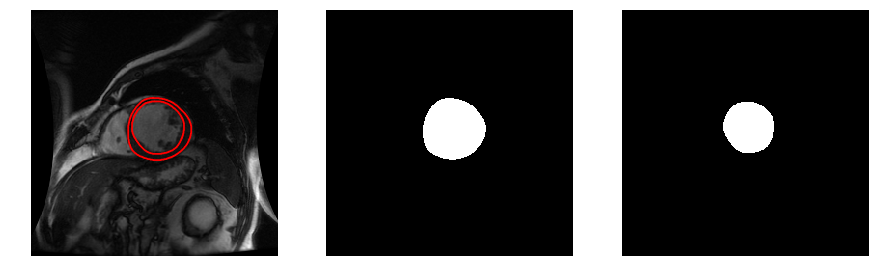

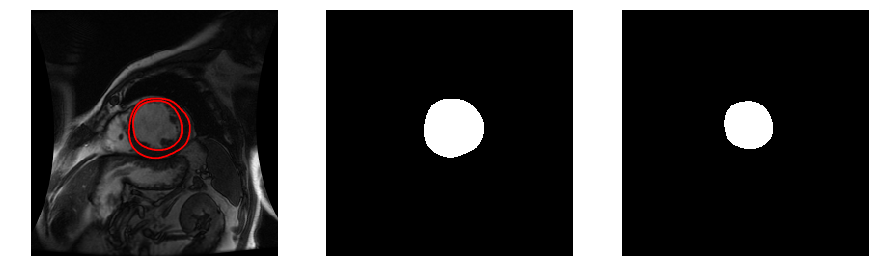

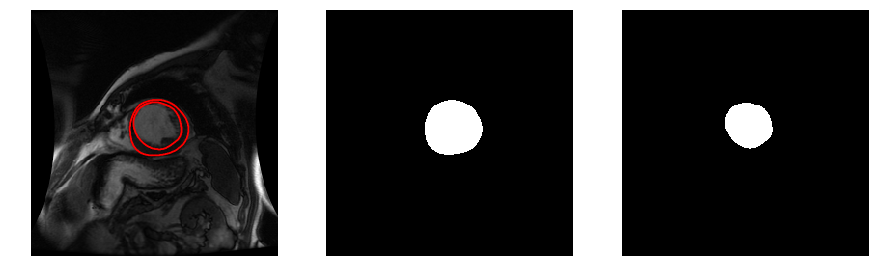

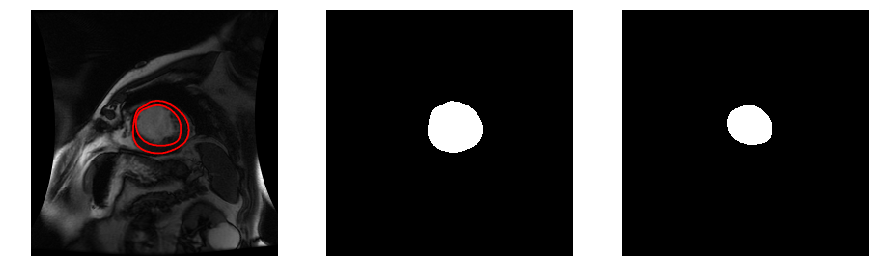

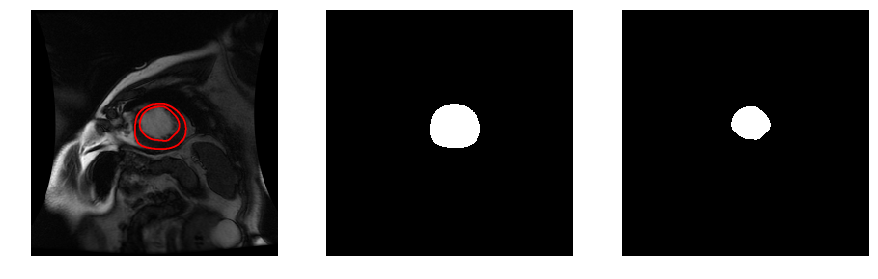

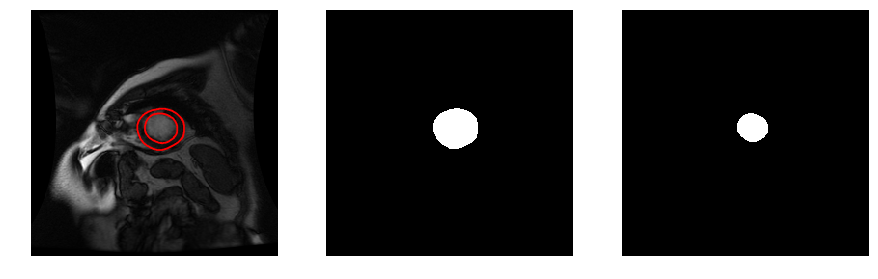

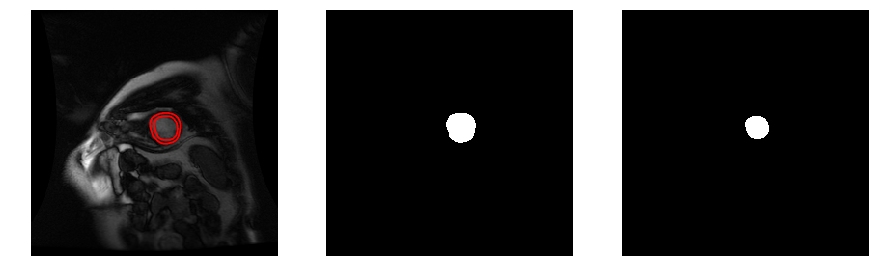

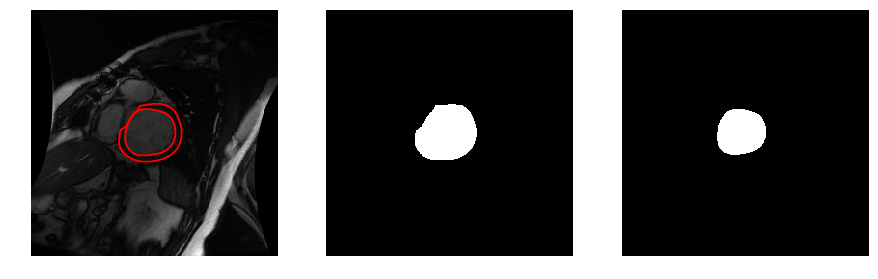

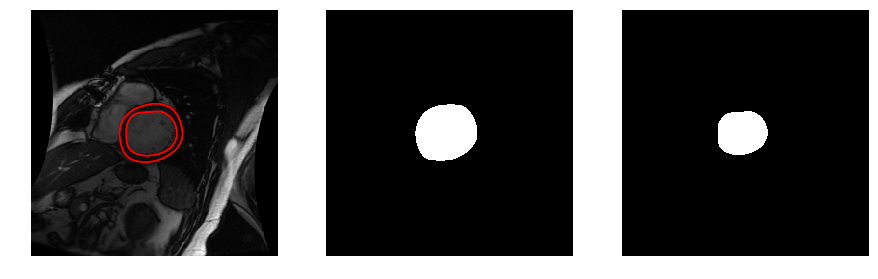

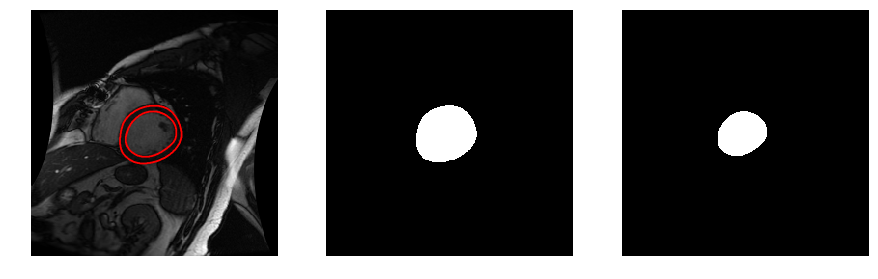

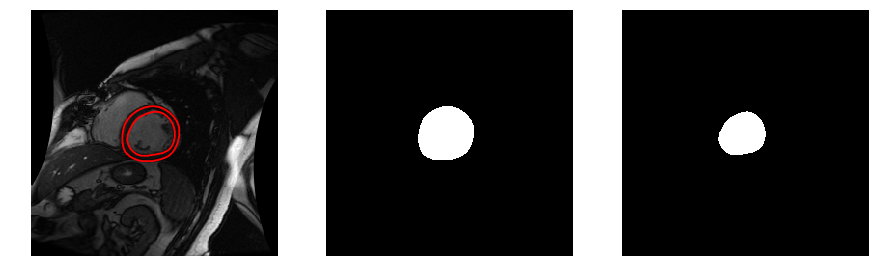

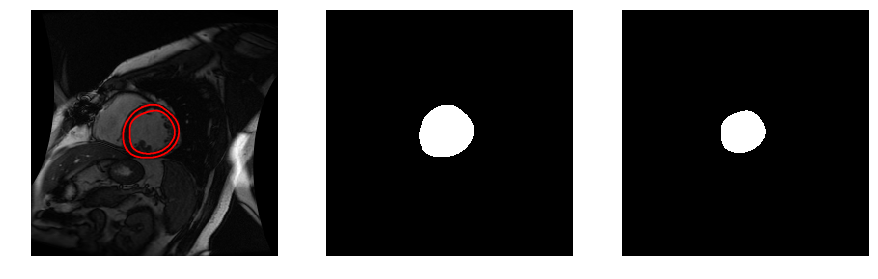

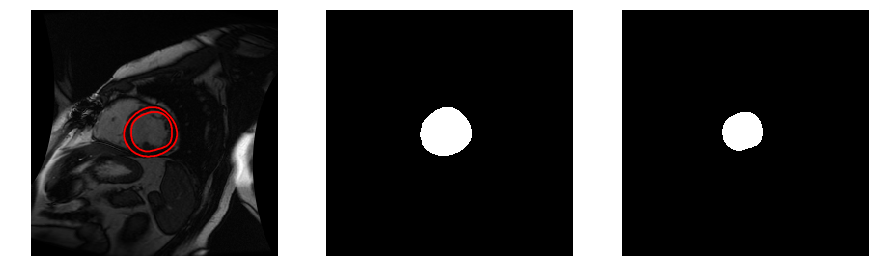

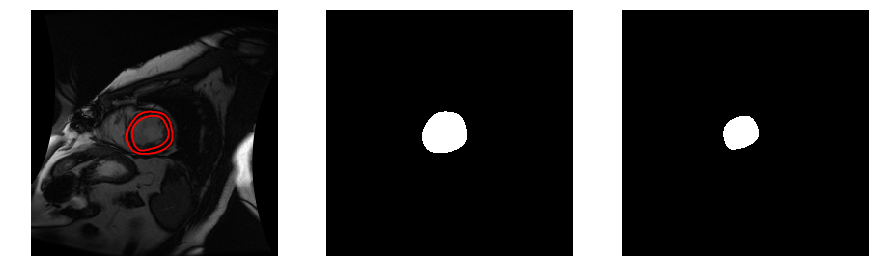

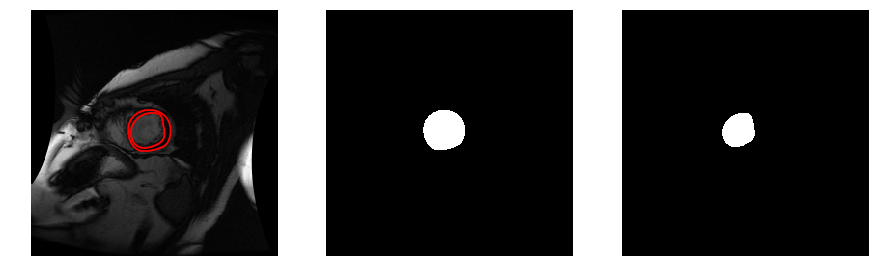

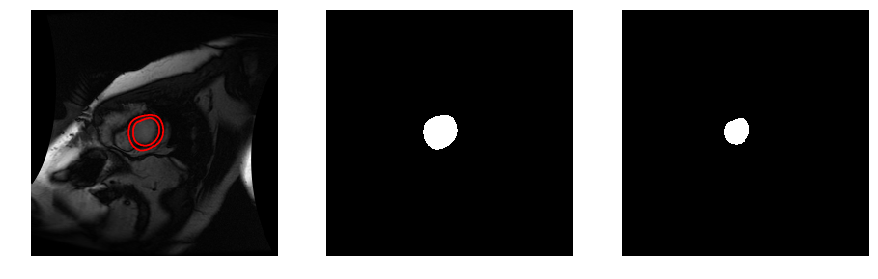

In [74]:
# plot the inner and outer contours

for idx, row in file_info.iterrows():
    dicom_img = parse_dicom_file(row.dicom_file_name_with_path)
    o_coords = ast.literal_eval(row.o_coords)
    i_coords = ast.literal_eval(row.i_coords)
    img_mask_o = poly_to_mask(o_coords, dicom_img.shape[0], dicom_img.shape[1])
    img_mask_i = poly_to_mask(i_coords, dicom_img.shape[0], dicom_img.shape[1])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(dicom_img, cmap='gray')
    ax[0].plot(np.array(o_coords)[:, 0], np.array(o_coords)[:, 1], 'r')
    ax[0].plot(np.array(i_coords)[:, 0], np.array(i_coords)[:, 1], 'r')
    ax[0].axis('off')
    ax[1].imshow(img_mask_o.astype(int), cmap='gray')
    ax[1].axis('off')
    ax[2].imshow(img_mask_i.astype(int), cmap='gray')
    ax[2].axis('off')
    plt.show()
    #plt.savefig(os.path.join(saved_images_dir, 'patient' + str(row.patient_id) + 'image' + str(int(row.image_num)) + '.png'))
    #plt.close()
    


Let’s assume that you want to create a system to outline the boundary of the blood pool (i-contours), and you already know the outer border of the heart muscle (o-contours). 

Compare the differences in pixel intensities inside the blood pool (inside the i-contour) to those inside the heart muscle (between the i-contours and o-contours); could you use a simple thresholding scheme to automatically create the i-contours, given the o-contours? Why or why not? Show figures that help justify your answer.


Do you think that any other heuristic (non-machine learning)-based approaches, besides simple thresholding, would work in this case? Explain.

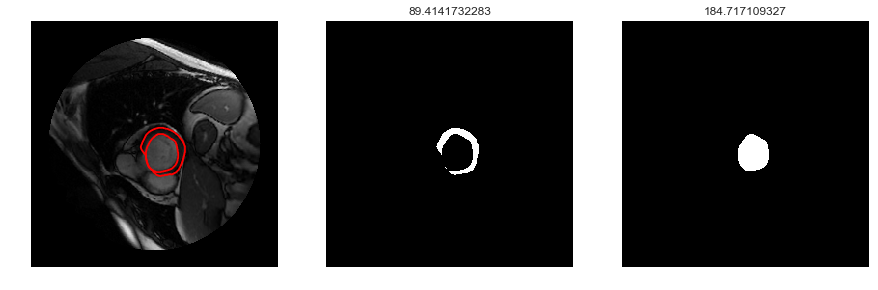

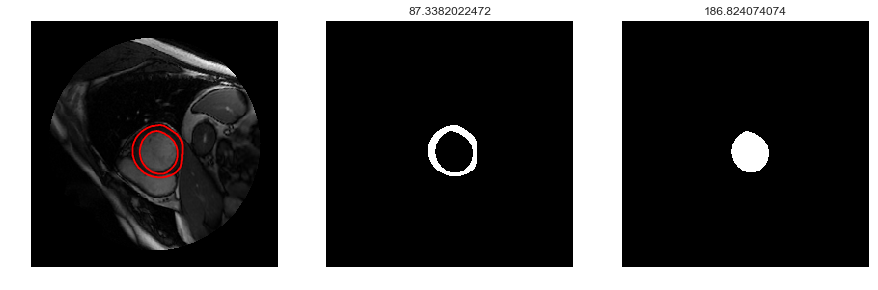

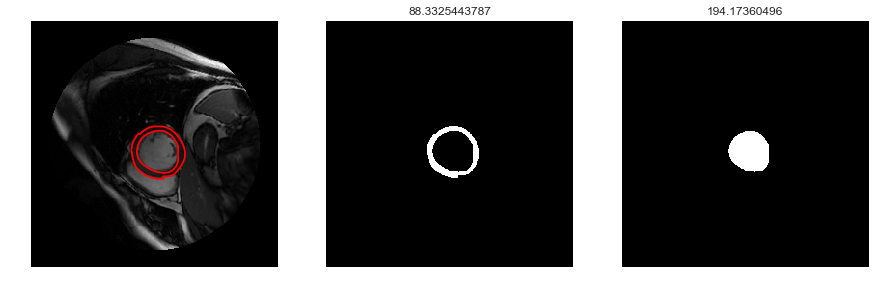

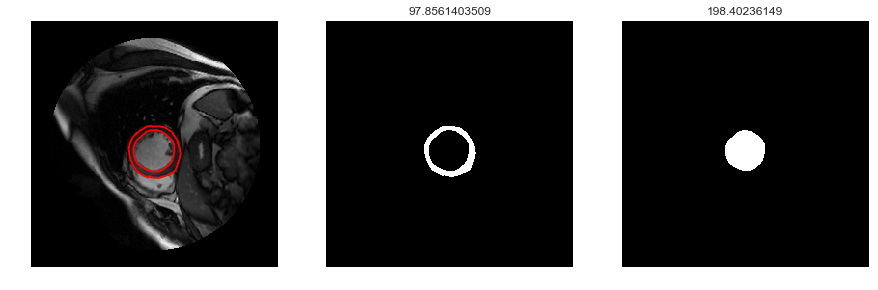

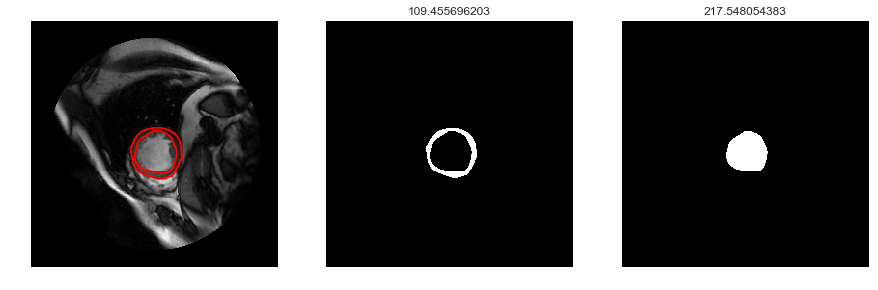

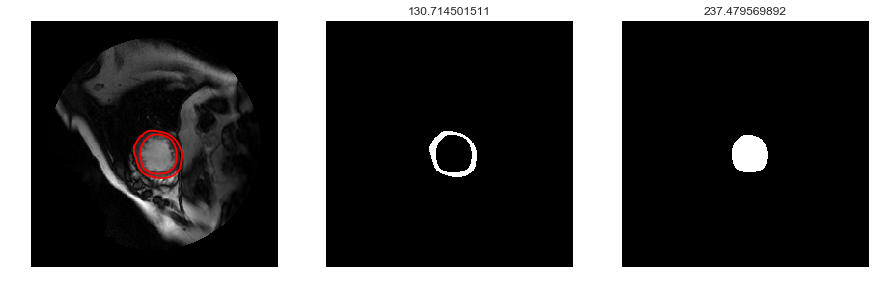

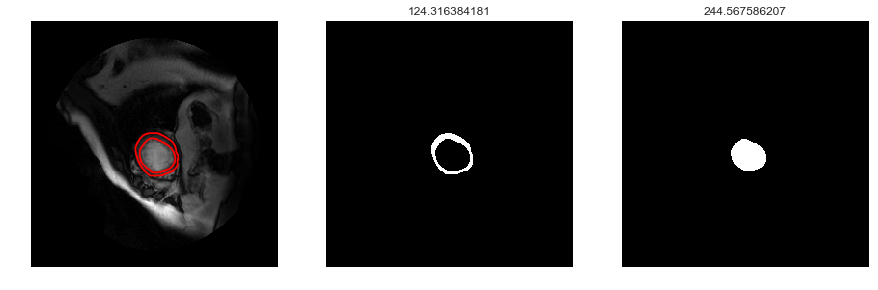

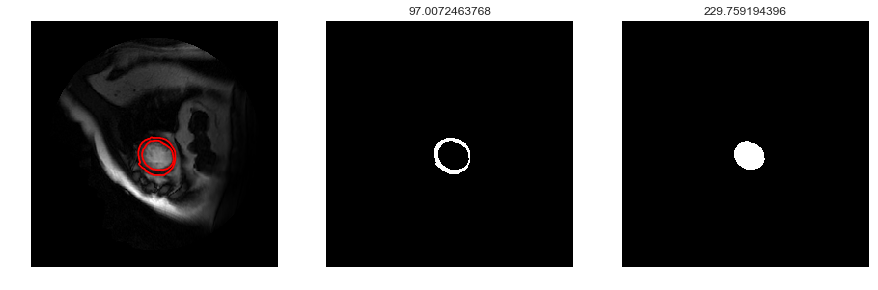

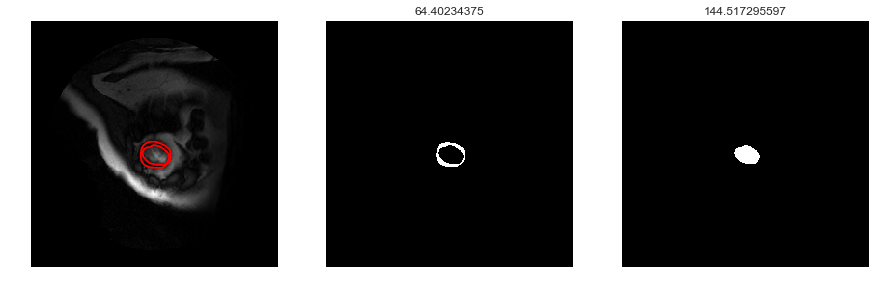

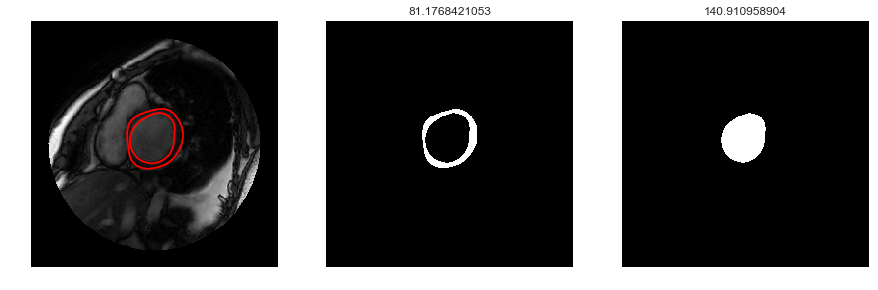

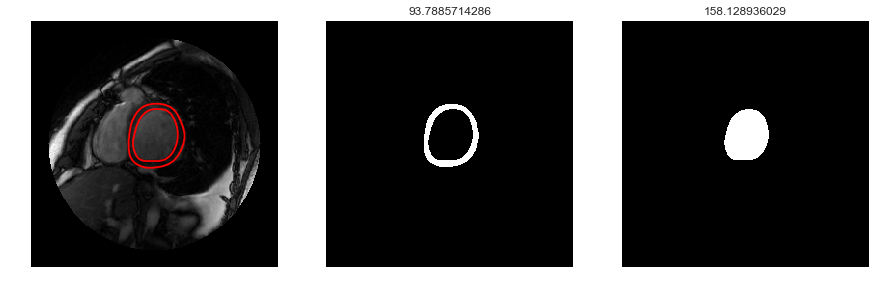

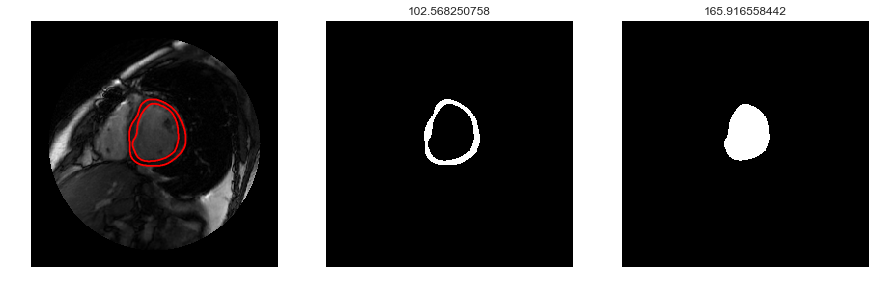

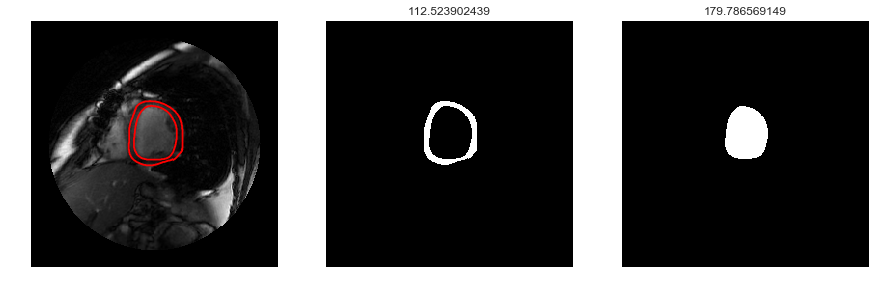

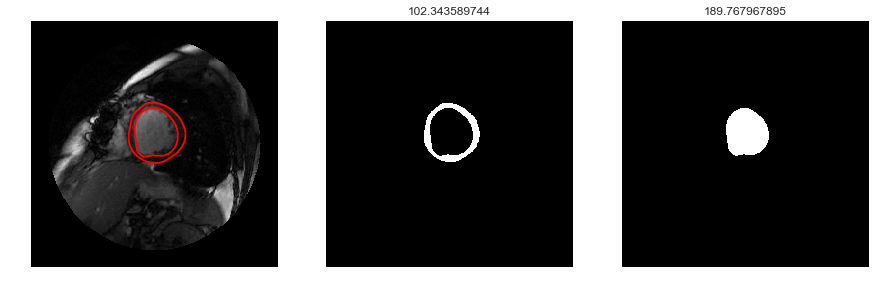

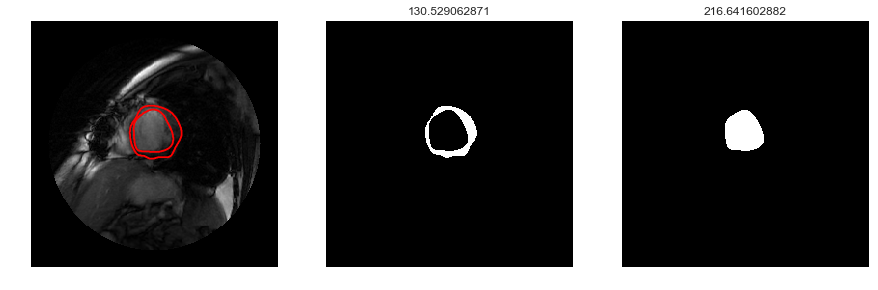

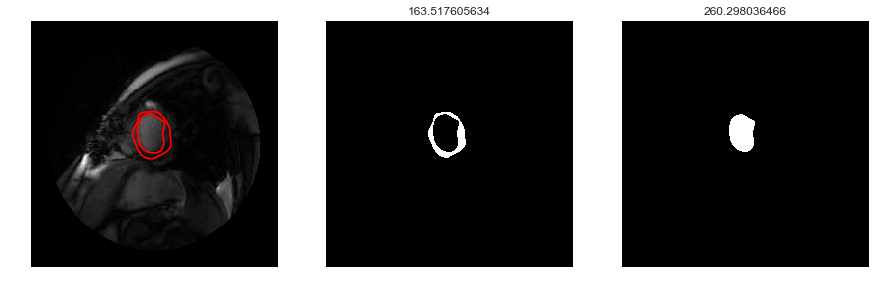

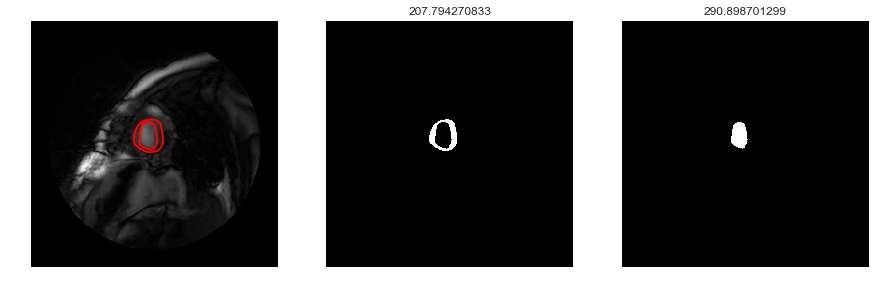

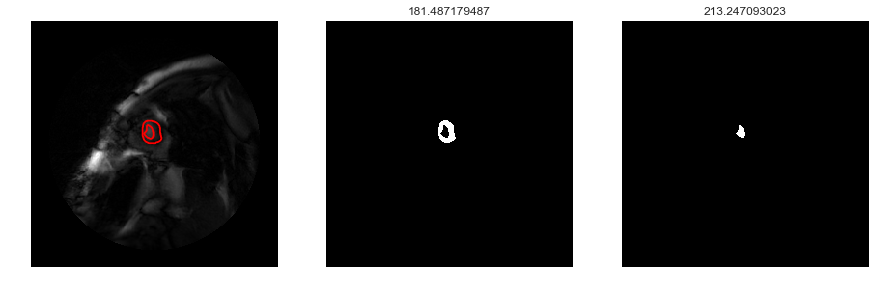

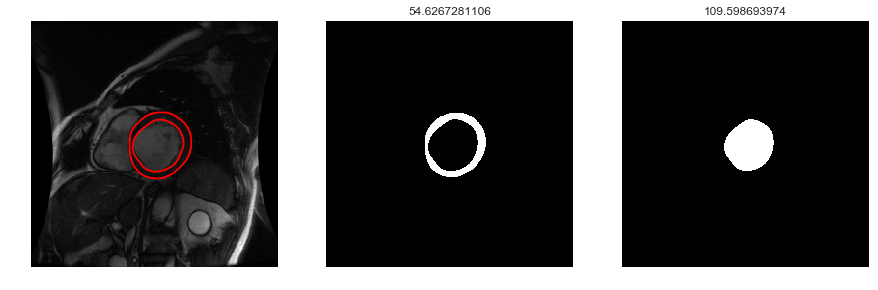

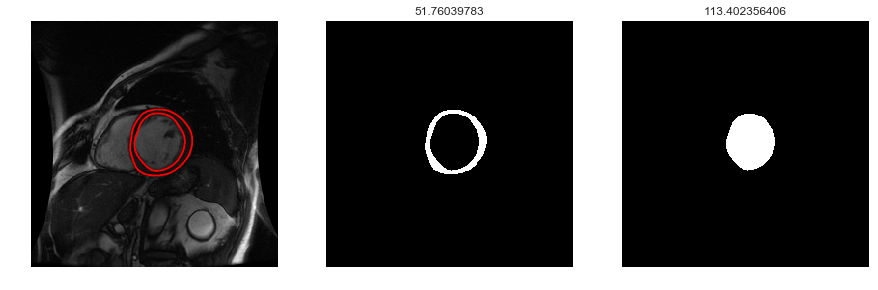

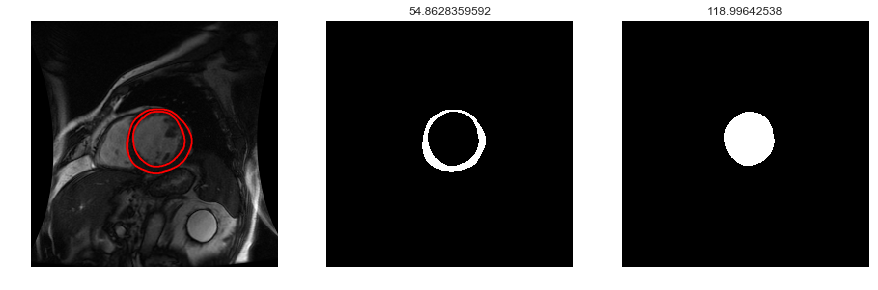

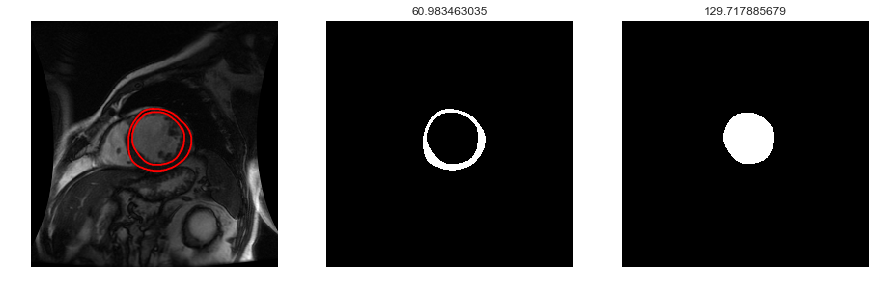

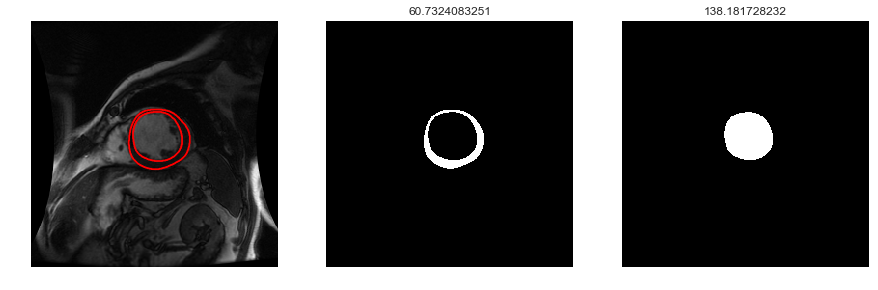

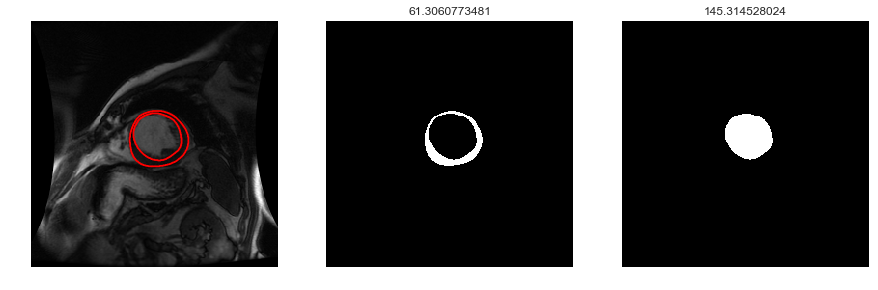

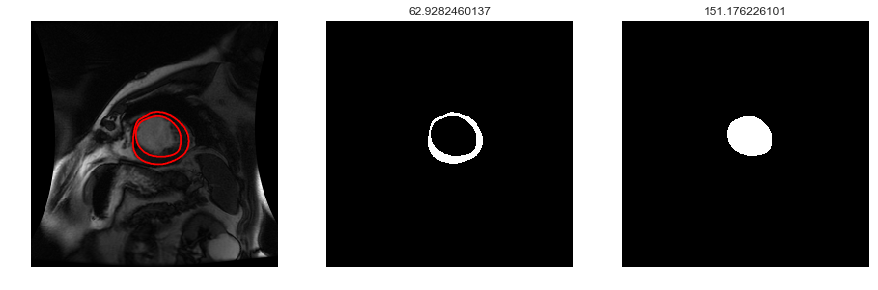

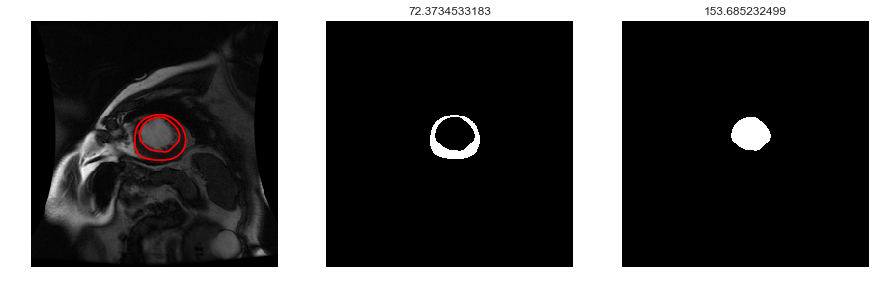

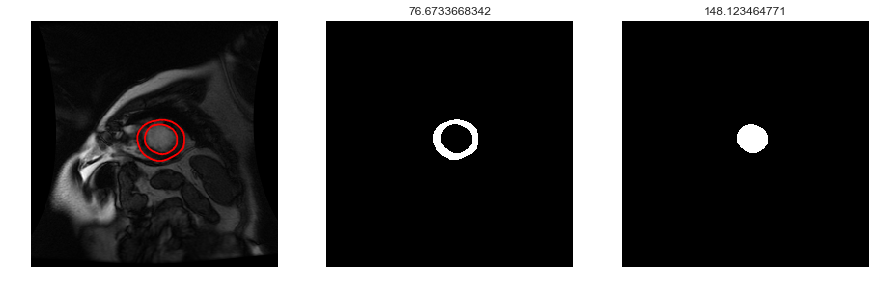

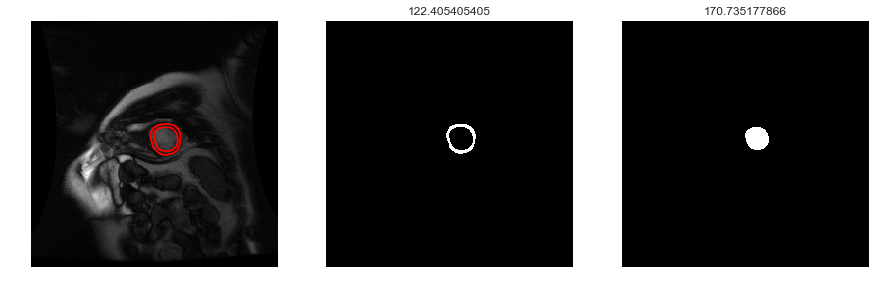

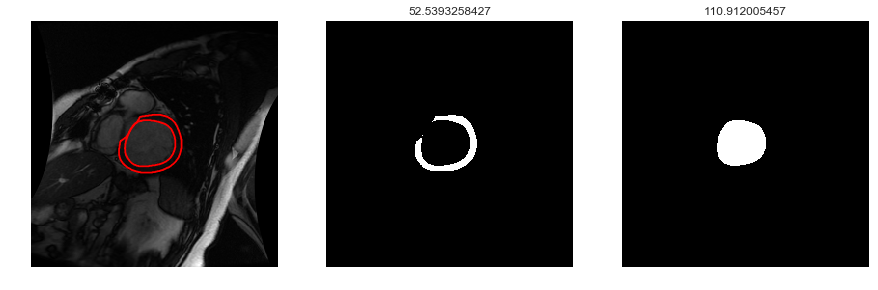

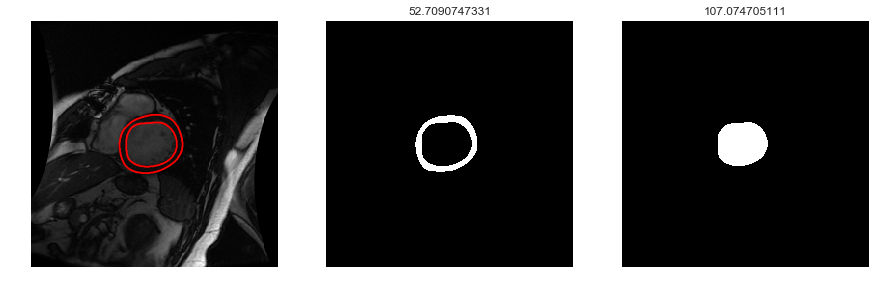

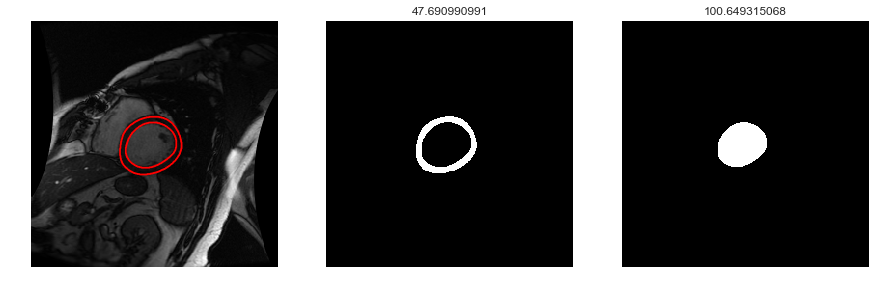

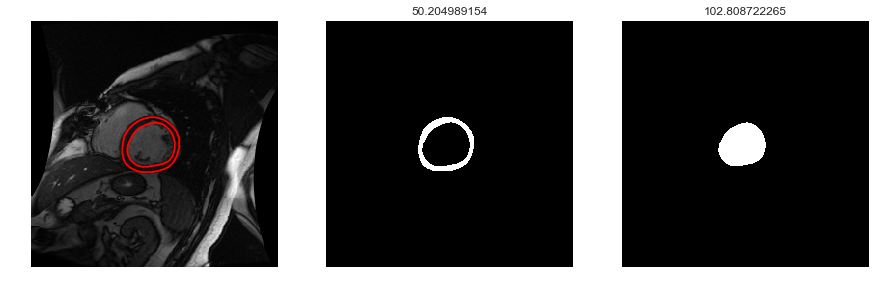

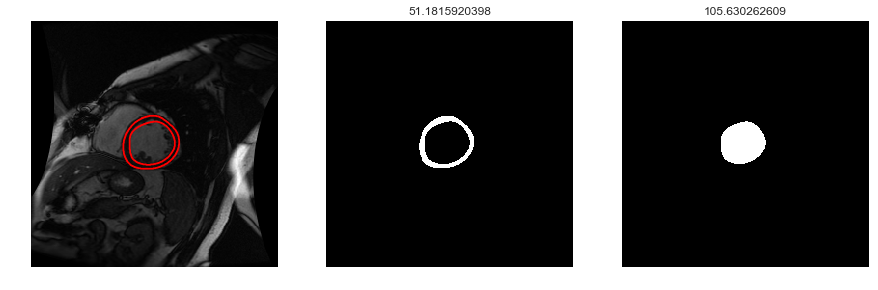

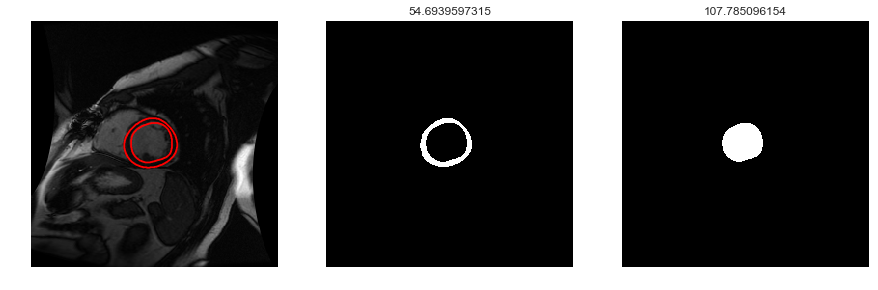

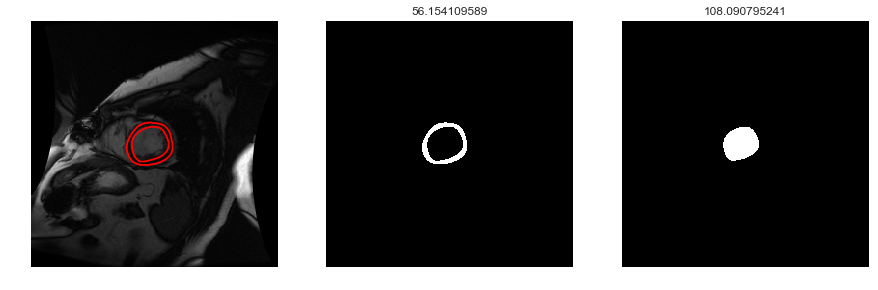

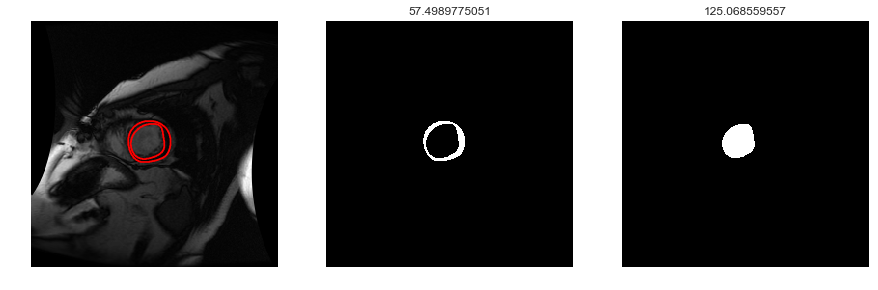

In [ ]:
# compute the inner and outer intensities

all_intensities_muscle = []
all_intensities_pool = []
intensities_muscle = []
intensities_pool = []

for idx, row in file_info.iterrows():
    dicom_img = parse_dicom_file(row.dicom_file_name_with_path)
    o_coords = ast.literal_eval(row.o_coords)
    i_coords = ast.literal_eval(row.i_coords)
    img_mask_o = poly_to_mask(o_coords, dicom_img.shape[0], dicom_img.shape[1])
    img_mask_i = poly_to_mask(i_coords, dicom_img.shape[0], dicom_img.shape[1])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(dicom_img, cmap='gray')
    ax[0].plot(np.array(o_coords)[:, 0], np.array(o_coords)[:, 1], 'r')
    ax[0].plot(np.array(i_coords)[:, 0], np.array(i_coords)[:, 1], 'r')
    ax[0].axis('off')
    diff_mask = img_mask_o.astype(int)-img_mask_i.astype(int)
    diff_mask[diff_mask<0] = 0
    diff_mask[diff_mask>1] = 1
    ax[1].imshow(diff_mask, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title(compute_average_intensity(dicom_img,diff_mask))
    ax[2].imshow(img_mask_i.astype(int), cmap='gray')
    ax[2].axis('off')
    ax[2].set_title(compute_average_intensity(dicom_img,img_mask_o.astype(int)))
    
    intensities_muscle.append(compute_average_intensity(dicom_img,diff_mask))
    intensities_pool.append(compute_average_intensity(dicom_img,img_mask_o.astype(int)))
    
    all_intensities_muscle.extend(list(dicom_img[diff_mask.astype(bool)]))
    all_intensities_pool.extend(list(dicom_img[img_mask_o.astype(bool)]))
    
    plt.show()
    
file_info['muscle_intensities'] = intensities_muscle
file_info['pool_intensitites'] = intensities_pool

In [ ]:
# plot the histograms of the average intensity inside and outside the regions

plt.hist(intensities_muscle,alpha=0.5)
plt.hist(intensities_pool,alpha=0.5)
plt.legend(['muscle intensities','blood pool intensities'])
plt.title('Average intensities, muscle and blood pool')
plt.show()

plt.hist(all_intensities_pool,alpha=0.5)
plt.hist(all_intensities_pool,alpha=0.5)
plt.legend(['muscle intensities','blood pool intensities'])
plt.title('All intensities, muscle and blood pool')
plt.show()

The above histogram shows that a simple thresholding scheme (thresholding all of the images based on a specific pixel value in order to get the i-contour) would not be sufficient. There is considerable overlap in the average pixel intensities between the inner blood pool and outer contour, so selecting a specific value for thresholding likely wouldn't work.

In [84]:
print(dicom_img.shape)
print()

(256, 256)
[47, 48, 41, 43, 45, 48, 59, 61, 54, 46, 46, 56, 62, 60, 62, 61, 47, 46, 65, 79, 78, 79, 74, 62, 55, 48, 44, 42, 53, 65, 76, 81, 88, 90, 82, 79, 92, 105, 109, 104, 99, 100, 88, 66, 57, 54, 49, 42, 46, 56, 58, 65, 82, 103, 114, 123, 129, 128, 134, 116, 84, 55, 50, 56, 45, 29, 47, 51, 62, 64, 69, 89, 115, 138, 147, 149, 86, 72, 60, 46, 39, 54, 54, 64, 80, 84, 98, 132, 153, 160, 91, 71, 48, 42, 43, 54, 59, 53, 61, 88, 106, 124, 79, 65, 54, 43, 44, 47, 54, 59, 85, 121, 67, 77, 70, 42, 26, 44, 45, 56, 74, 85, 116, 62, 64, 48, 28, 40, 38, 53, 90, 111, 70, 70, 52, 29, 18, 47, 50, 57, 78, 118, 138, 68, 54, 29, 27, 56, 65, 84, 107, 129, 62, 52, 33, 24, 82, 74, 84, 109, 132, 62, 54, 45, 21, 88, 76, 92, 123, 147, 56, 54, 48, 28, 79, 82, 100, 125, 63, 58, 50, 25, 40, 77, 74, 90, 108, 135, 68, 60, 48, 19, 47, 78, 87, 93, 113, 141, 69, 55, 52, 25, 44, 98, 90, 87, 110, 142, 74, 43, 41, 28, 80, 74, 82, 103, 136, 52, 31, 33, 20, 104, 92, 89, 104, 133, 32, 22, 20, 23, 87, 80, 99, 129, 44, 33,